In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   reporting_start      1143 non-null   object 
 2   reporting_end        1143 non-null   object 
 3   campaign_id          1143 non-null   object 
 4   fb_campaign_id       1143 non-null   object 
 5   age                  1143 non-null   object 
 6   gender               1143 non-null   object 
 7   interest1            1143 non-null   int64  
 8   interest2            1143 non-null   int64  
 9   interest3            1143 non-null   int64  
 10  impressions          1143 non-null   float64
 11  clicks               1143 non-null   int64  
 12  spent                1143 non-null   float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
mem

In [5]:
df.head(5)

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


### Data Preprocessing

In [7]:
df['reporting_start'] = pd.to_datetime(df['reporting_start'])
df['reporting_end'] = pd.to_datetime(df['reporting_end'])

/tmp/ipykernel_209419/3517159022.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['reporting_start'] = pd.to_datetime(df['reporting_start'])
/tmp/ipykernel_209419/3517159022.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['reporting_end'] = pd.to_datetime(df['reporting_end'])


In [13]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
ad_id,1143.0,987261.130359,708746.0,777632.5,1121185.0,1121804.5,1314415.0,193992.814738
reporting_start,1143,2017-08-23 00:26:27.401574912,2017-08-17 00:00:00,2017-08-20 00:00:00,2017-08-23 00:00:00,2017-08-26 00:00:00,2017-08-30 00:00:00,NaN
reporting_end,1143,2017-08-23 00:26:27.401574912,2017-08-17 00:00:00,2017-08-20 00:00:00,2017-08-23 00:00:00,2017-08-26 00:00:00,2017-08-30 00:00:00,NaN
interest1,1143.0,33.884514,2.0,16.0,26.0,32.0,120.0,27.560263
interest2,1143.0,118060.622922,3.0,22.0,33.0,98894.0,2286228.0,267050.550639
interest3,1143.0,42.474191,0.0,19.0,27.0,38.0,421.0,48.987248
impressions,1143.0,68724.998241,0.0,144.264998,3142.0,27864.0,3052003.0,206702.299206
clicks,1143.0,11.629921,0.0,1.0,2.0,8.0,340.0,27.347899
spent,1143.0,17.59776,0.0,0.0,1.53,8.54,639.949998,48.418711
total_conversion,761.0,2.161629,0.0,1.0,1.0,2.0,60.0,4.062201


In [14]:
cols = df.columns
colors = ['#000099', '#ffff00']

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0.5, 0, 'ad_id'),
  Text(1.5, 0, 'reporting_start'),
  Text(2.5, 0, 'reporting_end'),
  Text(3.5, 0, 'campaign_id'),
  Text(4.5, 0, 'fb_campaign_id'),
  Text(5.5, 0, 'age'),
  Text(6.5, 0, 'gender'),
  Text(7.5, 0, 'interest1'),
  Text(8.5, 0, 'interest2'),
  Text(9.5, 0, 'interest3'),
  Text(10.5, 0, 'impressions'),
  Text(11.5, 0, 'clicks'),
  Text(12.5, 0, 'spent'),
  Text(13.5, 0, 'total_conversion'),
  Text(14.5, 0, 'approved_conversion')])

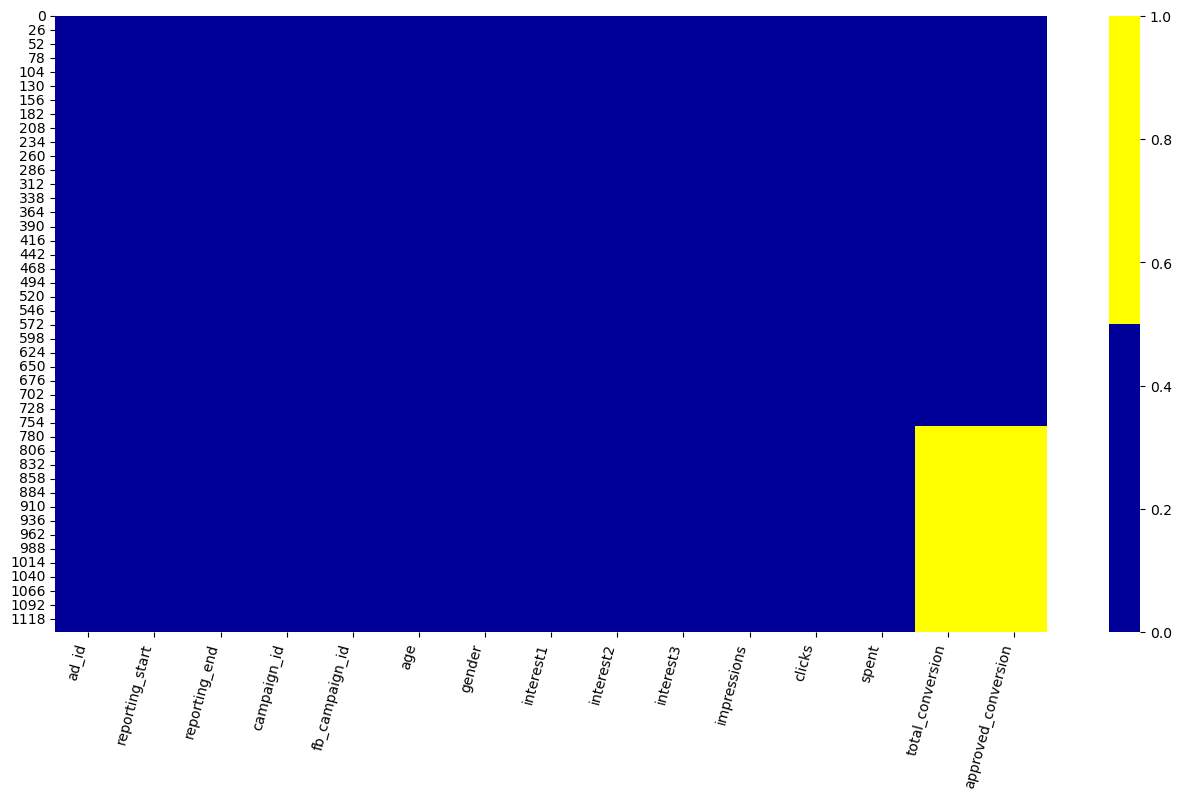

In [15]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colors), ax=ax)
plt.xticks(rotation=75, ha='right')

Then we drop the rows with null values. 

In [33]:
df_dropna = df.dropna(axis=0)
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 761 entries, 0 to 760
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ad_id                761 non-null    int64         
 1   reporting_start      761 non-null    datetime64[ns]
 2   reporting_end        761 non-null    datetime64[ns]
 3   campaign_id          761 non-null    object        
 4   fb_campaign_id       761 non-null    object        
 5   age                  761 non-null    object        
 6   gender               761 non-null    object        
 7   interest1            761 non-null    int64         
 8   interest2            761 non-null    int64         
 9   interest3            761 non-null    int64         
 10  impressions          761 non-null    float64       
 11  clicks               761 non-null    int64         
 12  spent                761 non-null    float64       
 13  total_conversion     761 non-null    flo

### Exploratory Data Analysis (EDA)

In [35]:
df_dropna['age'].value_counts()

age
30-34    327
35-39    180
40-44    139
45-49    115
Name: count, dtype: int64

In [36]:
df_dropna['gender'].value_counts()

gender
M    486
F    275
Name: count, dtype: int64

/home/yawen/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


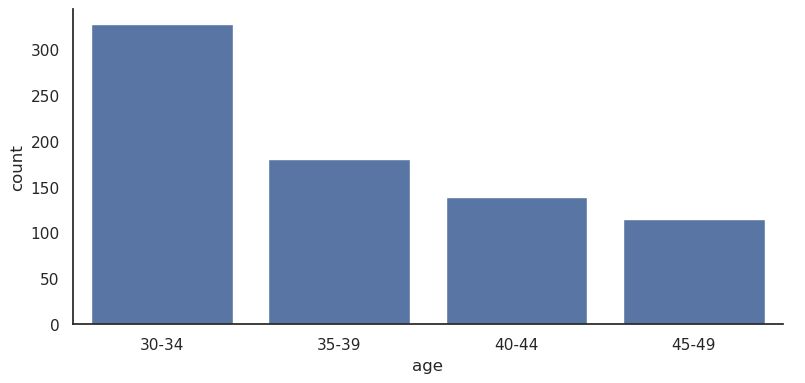

In [37]:
g = sns.catplot(
    x = 'age',
    kind = 'count',
    data = df_dropna,
    order = df_dropna['age'].value_counts().index,
    height = 4,
    aspect = 2
)

/home/yawen/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


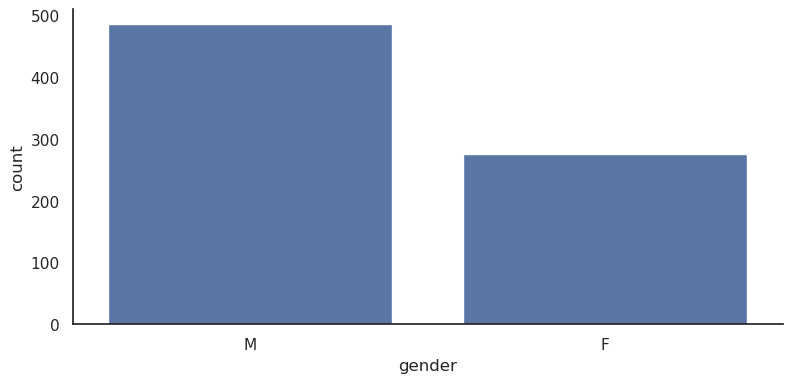

In [38]:
g = sns.catplot(
    x = 'gender',
    kind = 'count',
    data = df_dropna,
    order = df_dropna['gender'].value_counts().index,
    height = 4,
    aspect = 2
)

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 'Correlation Matrix')

<Axes: title={'center': 'Correlation Matrix'}>

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'interest1'),
  Text(1.5, 0, 'interest2'),
  Text(2.5, 0, 'interest3'),
  Text(3.5, 0, 'impressions'),
  Text(4.5, 0, 'clicks'),
  Text(5.5, 0, 'spent'),
  Text(6.5, 0, 'total_conversion'),
  Text(7.5, 0, 'approved_conversion')])

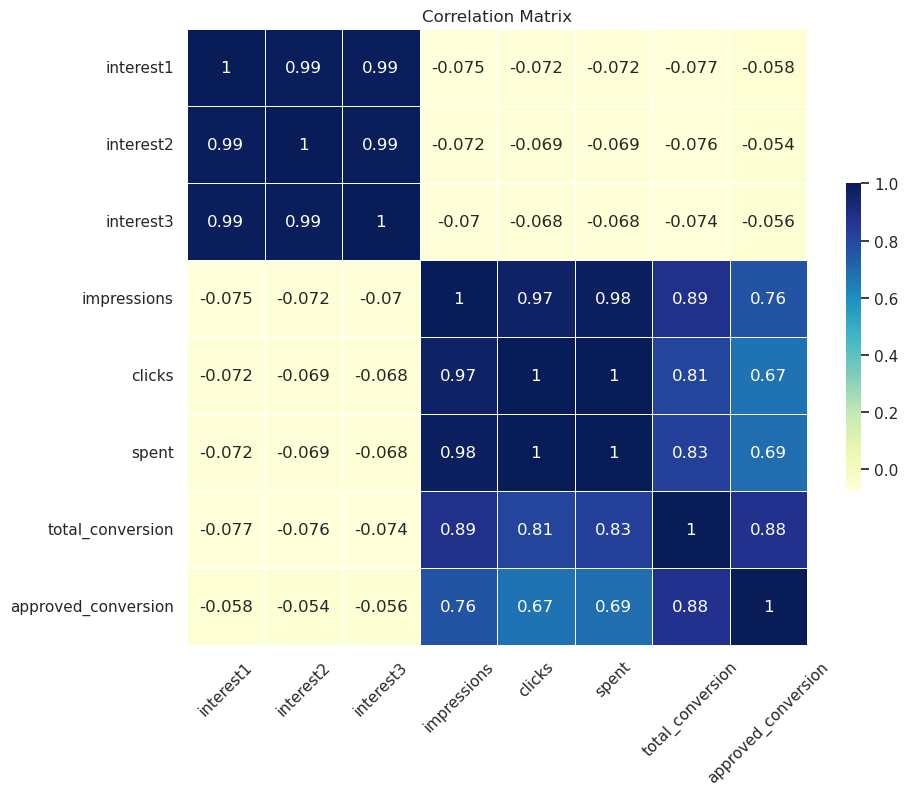

In [47]:
corr_df = df_dropna[['interest1', 'interest2', 'interest3', 'impressions', 'clicks', 'spent', 'total_conversion', 'approved_conversion']]
cor = corr_df.corr()

plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(cor, annot=True, fmt='.2g', linewidths=0.4, cmap='YlGnBu', cbar_kws={'shrink': .5})
plt.xticks(rotation=45)

#### Campaigns
Let's dive into the data by measuring the performance of these three campaigns. First plot the distribution of campaign_id over gender and ages. 

In [55]:
df_dropna.campaign_id.value_counts()

campaign_id
936     464
1178    243
916      54
Name: count, dtype: int64

<Figure size 1600x800 with 0 Axes>

/home/yawen/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x800 with 0 Axes>

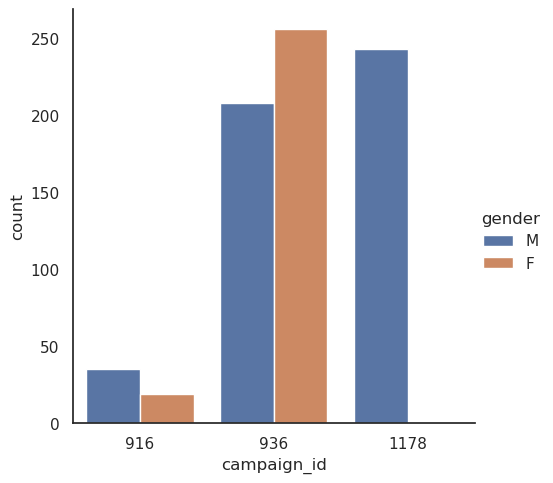

In [56]:
plt.figure(figsize=(16, 8))
sns.catplot(
    x = 'campaign_id',
    kind = 'count',
    data = df_dropna,
    hue = 'gender'
)

<Figure size 1600x800 with 0 Axes>

/home/yawen/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x800 with 0 Axes>

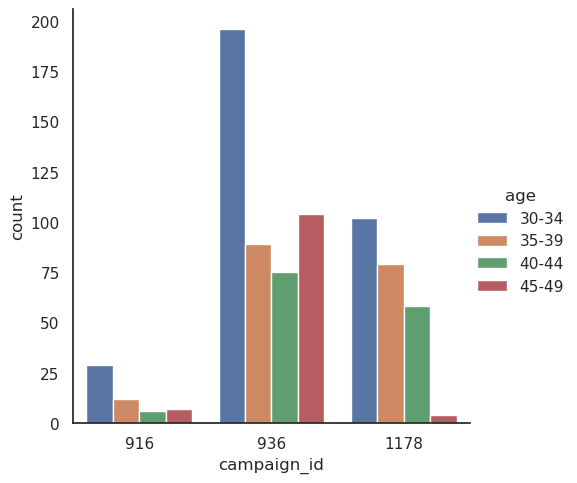

In [57]:
plt.figure(figsize=(16, 8))
sns.catplot(
    x = 'campaign_id',
    kind = 'count',
    data = df_dropna,
    hue = 'age'
)

Second, calculate the total conversion and approved conversion for each campaign.

In [66]:
total_conversion = df_dropna.groupby(['campaign_id']).agg({'total_conversion': sum})
total_conversion.reset_index()

/tmp/ipykernel_209419/1928886295.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_conversion = df_dropna.groupby(['campaign_id']).agg({'total_conversion': sum})


,campaign_id,total_conversion
0,1178,1050.0
1,916,58.0
2,936,537.0


In [79]:
approved_conversion = df_dropna.groupby(['campaign_id']).agg({'approved_conversion': sum})
approved_conversion.reset_index()

/tmp/ipykernel_209419/1316284597.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  approved_conversion = df_dropna.groupby(['campaign_id']).agg({'approved_conversion': sum})


,campaign_id,approved_conversion
0,1178,378.0
1,916,24.0
2,936,183.0


In [80]:
campaign = total_conversion.merge(approved_conversion, on='campaign_id')
campaign

,total_conversion,approved_conversion
campaign_id,,
1178,1050.0,378.0
916,58.0,24.0
936,537.0,183.0


In [81]:
campaign['percentage_approved'] = (campaign['approved_conversion'] / campaign['total_conversion']) * 100
campaign.reset_index()

,campaign_id,total_conversion,approved_conversion,percentage_approved
0,1178,1050.0,378.0,36.000000
1,916,58.0,24.0,41.379310
2,936,537.0,183.0,34.078212


In [82]:
spent = df_dropna.groupby(['campaign_id']).agg({'spent': sum})
spent.reset_index()

/tmp/ipykernel_209419/492481633.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  spent = df_dropna.groupby(['campaign_id']).agg({'spent': sum})


,campaign_id,spent
0,1178,16577.159998
1,916,149.710001
2,936,2893.369999


In [83]:
campaign = campaign.merge(spent, on='campaign_id')
campaign.reset_index()

,campaign_id,total_conversion,approved_conversion,percentage_approved,spent
0,1178,1050.0,378.0,36.000000,16577.159998
1,916,58.0,24.0,41.379310,149.710001
2,936,537.0,183.0,34.078212,2893.369999


In [84]:
clicks = df_dropna.groupby(['campaign_id']).agg({'clicks': sum})
campaign = campaign.merge(clicks, on='campaign_id')
campaign.reset_index()

/tmp/ipykernel_209419/3580760372.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clicks = df_dropna.groupby(['campaign_id']).agg({'clicks': sum})


,campaign_id,total_conversion,approved_conversion,percentage_approved,spent,clicks
0,1178,1050.0,378.0,36.000000,16577.159998,9577
1,916,58.0,24.0,41.379310,149.710001,113
2,936,537.0,183.0,34.078212,2893.369999,1984


In [85]:
impressions = df_dropna.groupby(['campaign_id']).agg({'impressions': sum})
campaign = campaign.merge(impressions, on='campaign_id')
campaign.reset_index()

/tmp/ipykernel_209419/4157938665.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  impressions = df_dropna.groupby(['campaign_id']).agg({'impressions': sum})


,campaign_id,total_conversion,approved_conversion,percentage_approved,spent,clicks,impressions
0,1178,1050.0,378.0,36.000000,16577.159998,9577,69902476.0
1,916,58.0,24.0,41.379310,149.710001,113,482925.0
2,936,537.0,183.0,34.078212,2893.369999,1984,8128187.0


### Simulat A/B Testing

Since the dataset we've got is historical data, we can't apply treatment to historical data, however, we can simulate A/B testing by grouping by ad type or interest targeting. 

In [154]:
df2 = pd.read_csv('KAG_conversion_data.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [156]:
cols = {
    'xyz_campaign_id': 'campaign_id',
    'Impressions': 'impressions',
    'Clicks': 'clicks',
    'Spent': 'spent',
    'Total_Conversion': 'total_conversion',
    'Approved_Conversion': 'approved_conversion'
}
df2 = df2.rename(columns=cols)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ad_id                1143 non-null   int64         
 1   reporting_start      1143 non-null   datetime64[ns]
 2   reporting_end        1143 non-null   datetime64[ns]
 3   campaign_id          1143 non-null   object        
 4   fb_campaign_id       1143 non-null   object        
 5   age                  1143 non-null   object        
 6   gender               1143 non-null   object        
 7   interest1            1143 non-null   int64         
 8   interest2            1143 non-null   int64         
 9   interest3            1143 non-null   int64         
 10  impressions          1143 non-null   float64       
 11  clicks               1143 non-null   int64         
 12  spent                1143 non-null   float64       
 13  total_conversion     761 non-null

In [159]:
df1_col = ['ad_id', 'reporting_start', 'reporting_end', 'interest1', 'interest2', 'interest3']
df1 = df[df1_col]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ad_id            1143 non-null   int64         
 1   reporting_start  1143 non-null   datetime64[ns]
 2   reporting_end    1143 non-null   datetime64[ns]
 3   interest1        1143 non-null   int64         
 4   interest2        1143 non-null   int64         
 5   interest3        1143 non-null   int64         
dtypes: datetime64[ns](2), int64(4)
memory usage: 53.7 KB


In [160]:
df_full = pd.merge(df1, df2, on=['ad_id'])
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ad_id                1143 non-null   int64         
 1   reporting_start      1143 non-null   datetime64[ns]
 2   reporting_end        1143 non-null   datetime64[ns]
 3   interest1            1143 non-null   int64         
 4   interest2            1143 non-null   int64         
 5   interest3            1143 non-null   int64         
 6   campaign_id          1143 non-null   int64         
 7   fb_campaign_id       1143 non-null   int64         
 8   age                  1143 non-null   object        
 9   gender               1143 non-null   object        
 10  interest             1143 non-null   int64         
 11  impressions          1143 non-null   int64         
 12  clicks               1143 non-null   int64         
 13  spent                1143 non-nul

In [161]:
df_full.head()

,ad_id,reporting_start,reporting_end,interest1,interest2,interest3,campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,2017-08-17,2017-08-17,15,17,17,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,2017-08-17,2017-08-17,16,19,21,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,2017-08-17,2017-08-17,20,25,22,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,2017-08-30,2017-08-30,28,32,32,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,2017-08-17,2017-08-17,28,33,32,916,103928,30-34,M,28,4133,1,1.29,1,1


In [162]:
from sklearn.impute import KNNImputer
from scipy.stats import shapiro, levene, mannwhitneyu

In [163]:
### Data Cleaning
print(len(df_full[(df_full['clicks'] == 0) & (df_full['total_conversion'] != 0)]))        # check how many ads with 0 clicks however non-zero conversion

df_full['clicks'].replace(0, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=2)
df_imputed = pd.DataFrame(imputer.fit_transform(df_full.drop(columns=['gender', 'age', 'reporting_start', 'reporting_end'])))

df_full['clicks'] = df_imputed[8]

204


/tmp/ipykernel_209419/2462782939.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_full['clicks'].replace(0, np.nan, inplace=True)


In [164]:
df_full['ad_id'] = df_full['ad_id'].astype('object')
df_full['campaign_id'] = df_full['campaign_id'].astype('object')
df_full['fb_campaign_id'] = df_full['fb_campaign_id'].astype('object')

#### Compute Metrics

In [165]:
## Conversion Rate
df_full["cr"] = df_full["total_conversion"] / df_full["impressions"]
## Click-through Rate
df_full["ctr"] = df_full["clicks"] / df_full["impressions"]
## Cost per Click
df_full["cpc"] = df_full["spent"] / df_full["clicks"]

In [166]:
df_full[['cr', 'ctr', 'cpc']].head()

,cr,ctr,cpc
0,0.000272,0.000136,1.43
1,0.000112,0.000112,0.91
2,0.001443,0.001443,0.00
3,0.000235,0.000235,1.25
4,0.000242,0.000242,1.29


In [167]:
df_full.to_csv('df_full.csv', index=False)

In [168]:
df_full.campaign_id.value_counts()

campaign_id
1178    625
936     464
916      54
Name: count, dtype: int64

In [172]:
df_full.age.value_counts()

age
30-34    426
45-49    259
35-39    248
40-44    210
Name: count, dtype: int64

/home/yawen/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


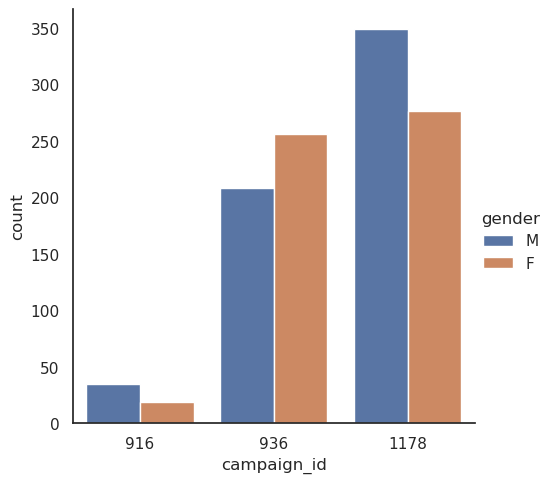

In [170]:
sns.catplot(
    x = 'campaign_id',
    kind = 'count',
    data = df_full,
    hue = 'gender'
)

/home/yawen/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


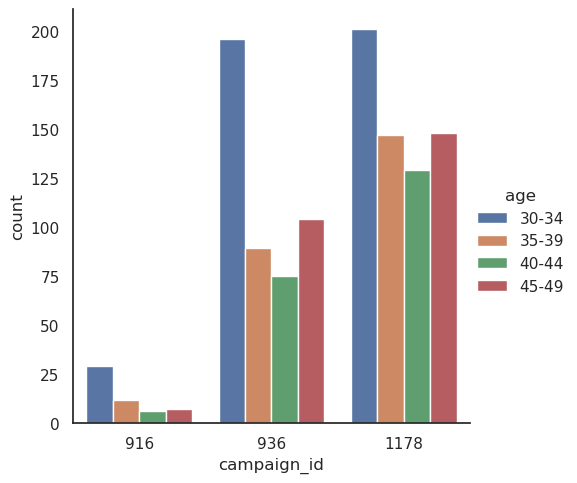

In [171]:
sns.catplot(
    x = 'campaign_id',
    kind = 'count',
    data = df_full,
    hue = 'age'
)

[None]

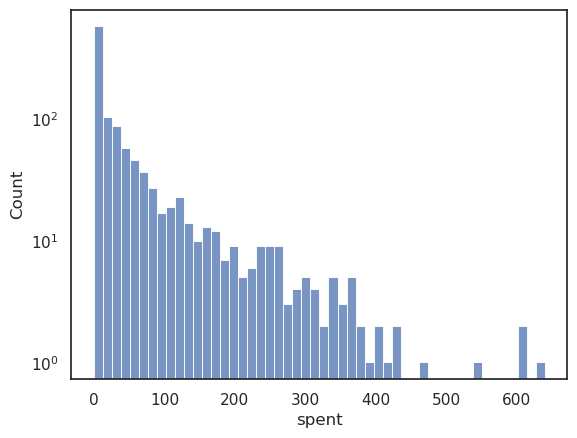

In [175]:
g = sns.histplot(
    data = df_full,
    x = 'spent',
    bins = 50
)
g.set(yscale='log')

/home/yawen/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


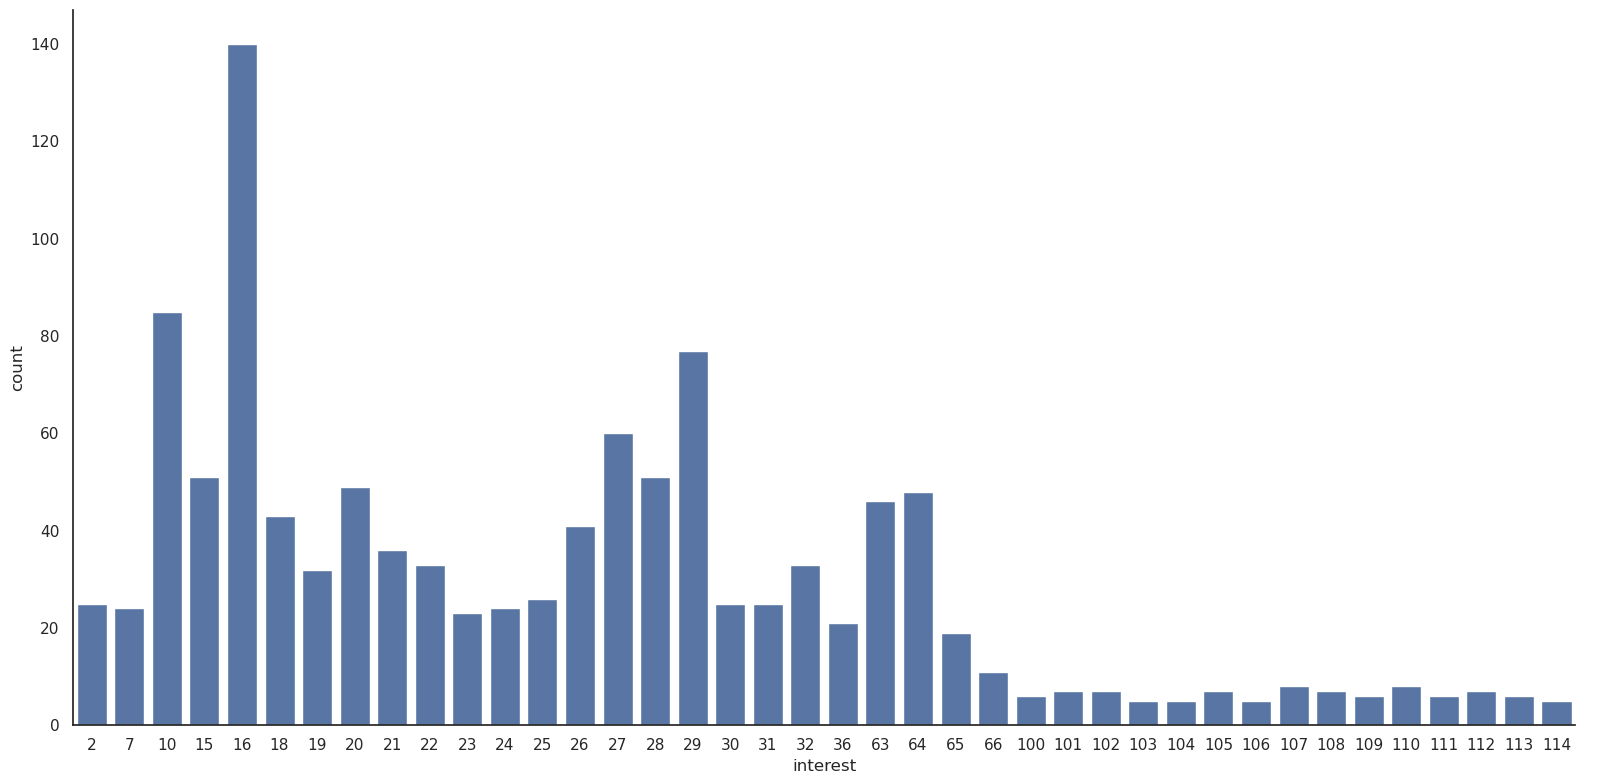

In [182]:
sns.catplot(
    x = 'interest',
    kind = 'count',
    data = df_full,
    height = 8, 
    aspect = 2
)

<Axes: xlabel='campaign_id'>

Text(0.5, 0, 'campaign_id')

<Axes: xlabel='age'>

Text(0.5, 0, 'Age Group')

<Axes: xlabel='gender'>

Text(0.5, 0, 'Gender')

<Axes: >

Text(0.5, 0, 'Impressions')

[None]

<Axes: >

Text(0.5, 0, 'Spent')

[None]

<Axes: >

Text(0.5, 0, 'Clicks')

[None]

<Axes: >

Text(0.5, 0, 'Total Conversion')

[None]

<Axes: >

Text(0.5, 0, 'Approved Conversion')

[None]

(0.0, 1.0, 0.0, 1.0)

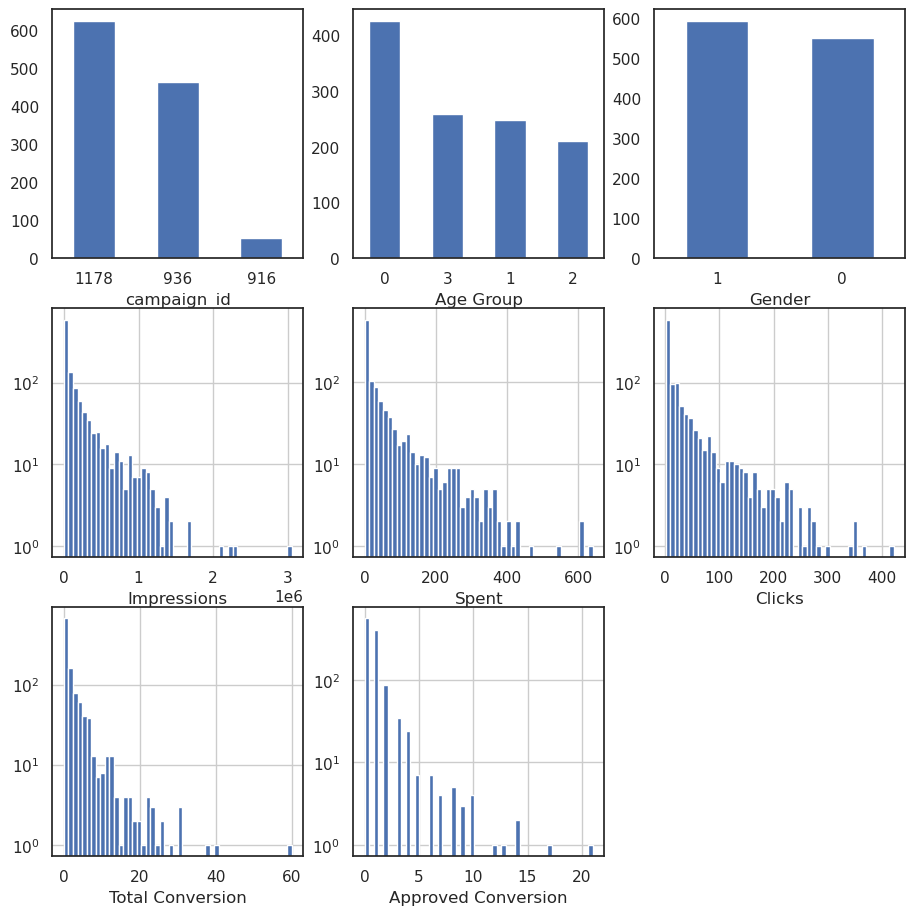

In [316]:
fig, ax = plt.subplots(3, 3, figsize=(11, 11))
df_full['campaign_id'].value_counts().plot(kind='bar', ax=ax[0][0])
ax[0][0].tick_params(labelrotation=0)
ax[0][0].set_xlabel('campaign_id')

df_full['age'].value_counts().plot(kind='bar', ax=ax[0][1])
ax[0][1].tick_params(labelrotation=0)
ax[0][1].set_xlabel('Age Group')

df_full['gender'].value_counts().plot(kind='bar', ax=ax[0][2])
ax[0][2].tick_params(labelrotation=0)
ax[0][2].set_xlabel('Gender')

df_full['impressions'].hist(ax=ax[1][0], bins=50)
ax[1][0].tick_params(labelrotation=0)
ax[1][0].set_xlabel('Impressions')
ax[1][0].set(yscale='log')

df_full['spent'].hist(ax=ax[1][1], bins=50)
ax[1][1].tick_params(labelrotation=0)
ax[1][1].set_xlabel('Spent')
ax[1][1].set(yscale='log')

df_full['clicks'].hist(ax=ax[1][2], bins=50)
ax[1][2].tick_params(labelrotation=0)
ax[1][2].set_xlabel('Clicks')
ax[1][2].set(yscale='log')

df_full['total_conversion'].hist(ax=ax[2][0], bins=50)
ax[2][0].tick_params(labelrotation=0)
ax[2][0].set_xlabel('Total Conversion')
ax[2][0].set(yscale='log')

df_full['approved_conversion'].hist(ax=ax[2][1], bins=50)
ax[2][1].tick_params(labelrotation=0)
ax[2][1].set_xlabel('Approved Conversion')
ax[2][1].set(yscale='log')

ax[2][2].axis('off')

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 'Correlation Matrix')

<Axes: title={'center': 'Correlation Matrix'}>

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'interest1'),
  Text(1.5, 0, 'interest2'),
  Text(2.5, 0, 'interest3'),
  Text(3.5, 0, 'interest'),
  Text(4.5, 0, 'impressions'),
  Text(5.5, 0, 'spent'),
  Text(6.5, 0, 'clicks'),
  Text(7.5, 0, 'total_conversion'),
  Text(8.5, 0, 'approved_conversion')])

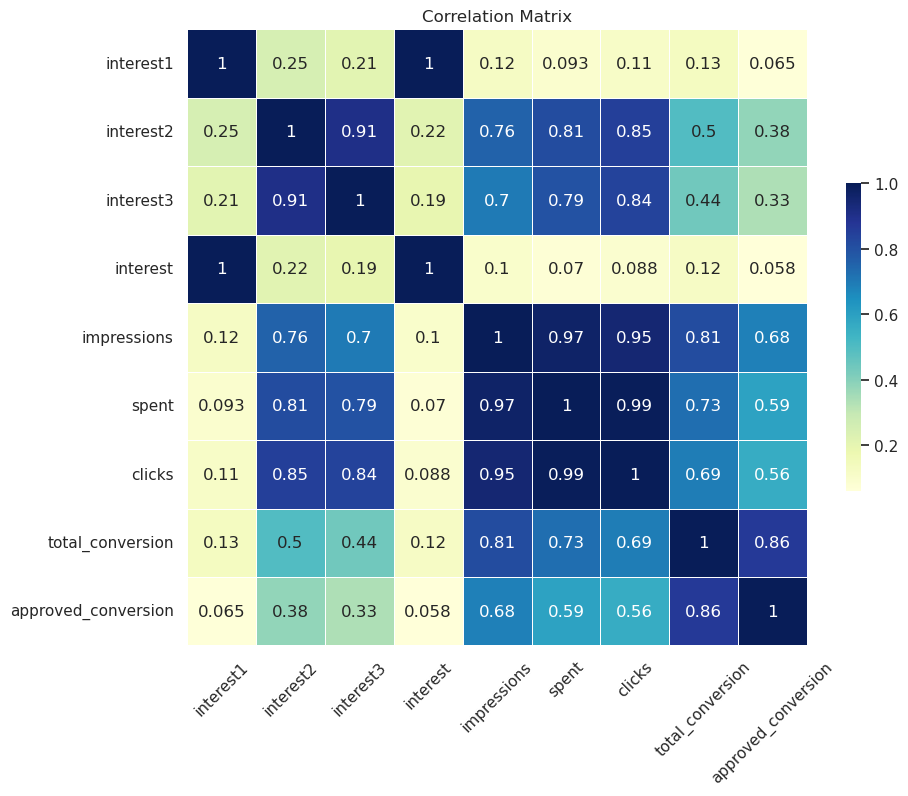

In [197]:
cor = df_full[['interest1', 'interest2', 'interest3', 'interest', 'impressions', 'spent', 'clicks', 'total_conversion', 'approved_conversion']].corr()

plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(cor, annot=True, fmt='.2g', linewidths=0.4, cmap='YlGnBu', cbar_kws={'shrink': .5})
plt.xticks(rotation=45)

<Axes: xlabel='interest', ylabel='impressions'>

Text(0.5, 1.0, 'interest vs impressions')

<Axes: xlabel='interest', ylabel='clicks'>

Text(0.5, 1.0, 'interest vs clicks')

<Axes: xlabel='interest', ylabel='spent'>

Text(0.5, 1.0, 'interest vs spent')

<Axes: xlabel='interest', ylabel='approved_conversion'>

Text(0.5, 1.0, 'interest vs approved_conversion')

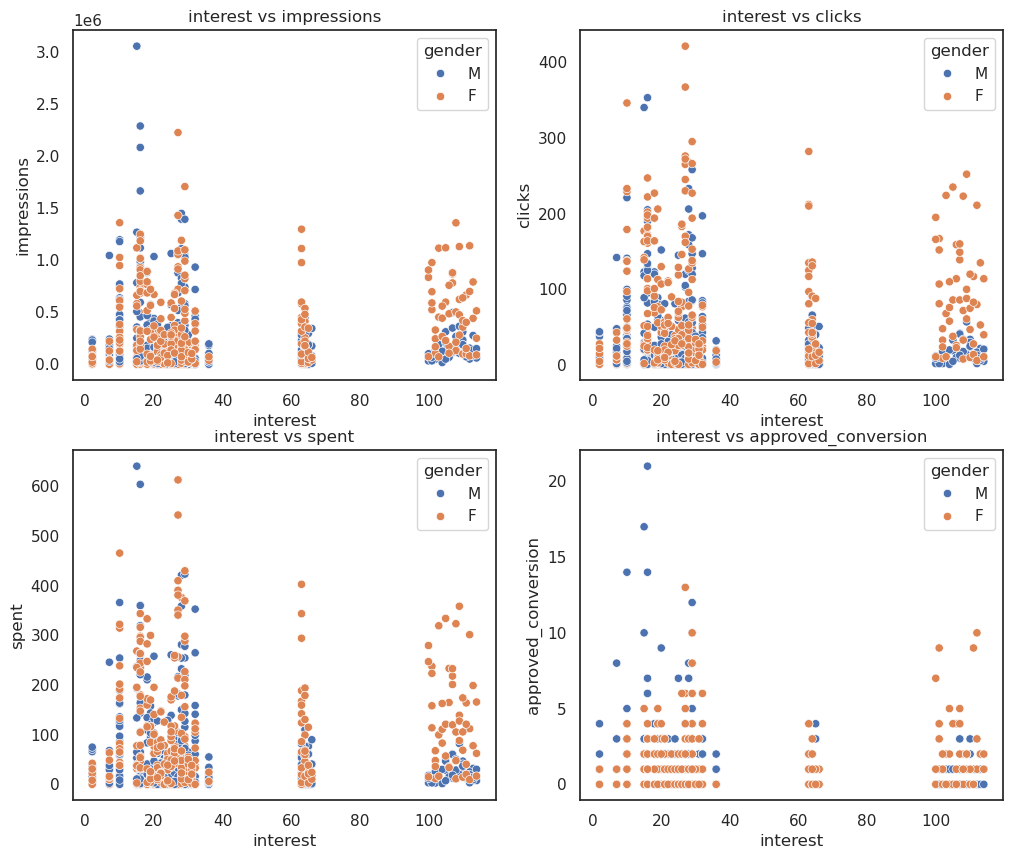

In [215]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
feature_pairs = [('interest', 'impressions'), ('interest', 'clicks'), 
                 ('interest', 'spent'), ('interest', 'approved_conversion')]
hue = 'gender'
for ax, (fea1, fea2) in zip(axes, feature_pairs):
    sns.scatterplot(
        data = df_full,
        x = fea1,
        y = fea2,
        hue = hue,
        ax = ax
    )
    ax.set_title(f"{fea1} vs {fea2}")

    

<Axes: xlabel='interest', ylabel='impressions'>

Text(0.5, 1.0, 'interest vs impressions')

<Axes: xlabel='interest', ylabel='clicks'>

Text(0.5, 1.0, 'interest vs clicks')

<Axes: xlabel='interest', ylabel='spent'>

Text(0.5, 1.0, 'interest vs spent')

<Axes: xlabel='interest', ylabel='approved_conversion'>

Text(0.5, 1.0, 'interest vs approved_conversion')

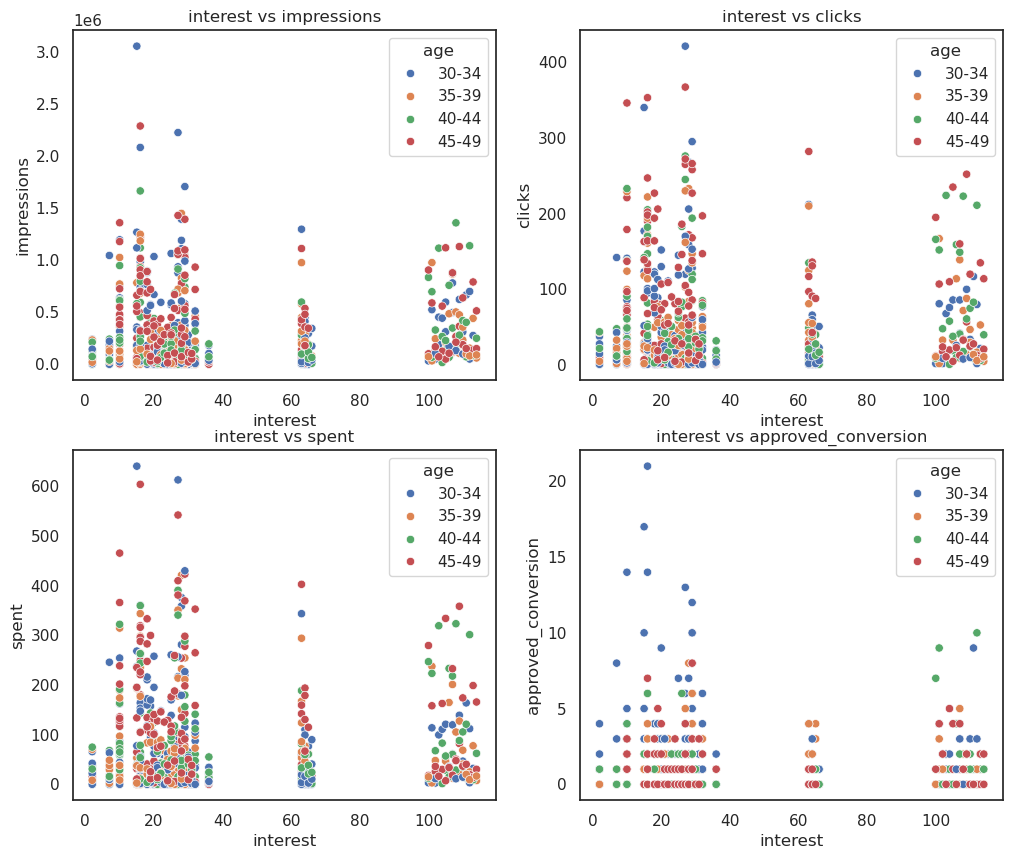

In [218]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
feature_pairs = [('interest', 'impressions'), ('interest', 'clicks'), 
                 ('interest', 'spent'), ('interest', 'approved_conversion')]
hue = 'age'
for ax, (fea1, fea2) in zip(axes, feature_pairs):
    sns.scatterplot(
        data = df_full,
        x = fea1,
        y = fea2,
        hue = hue,
        ax = ax
    )
    ax.set_title(f"{fea1} vs {fea2}")


<Axes: xlabel='spent', ylabel='impressions'>

Text(0.5, 1.0, 'spent vs impressions')

<Axes: xlabel='spent', ylabel='clicks'>

Text(0.5, 1.0, 'spent vs clicks')

<Axes: xlabel='spent', ylabel='total_conversion'>

Text(0.5, 1.0, 'spent vs total_conversion')

<Axes: xlabel='spent', ylabel='approved_conversion'>

Text(0.5, 1.0, 'spent vs approved_conversion')

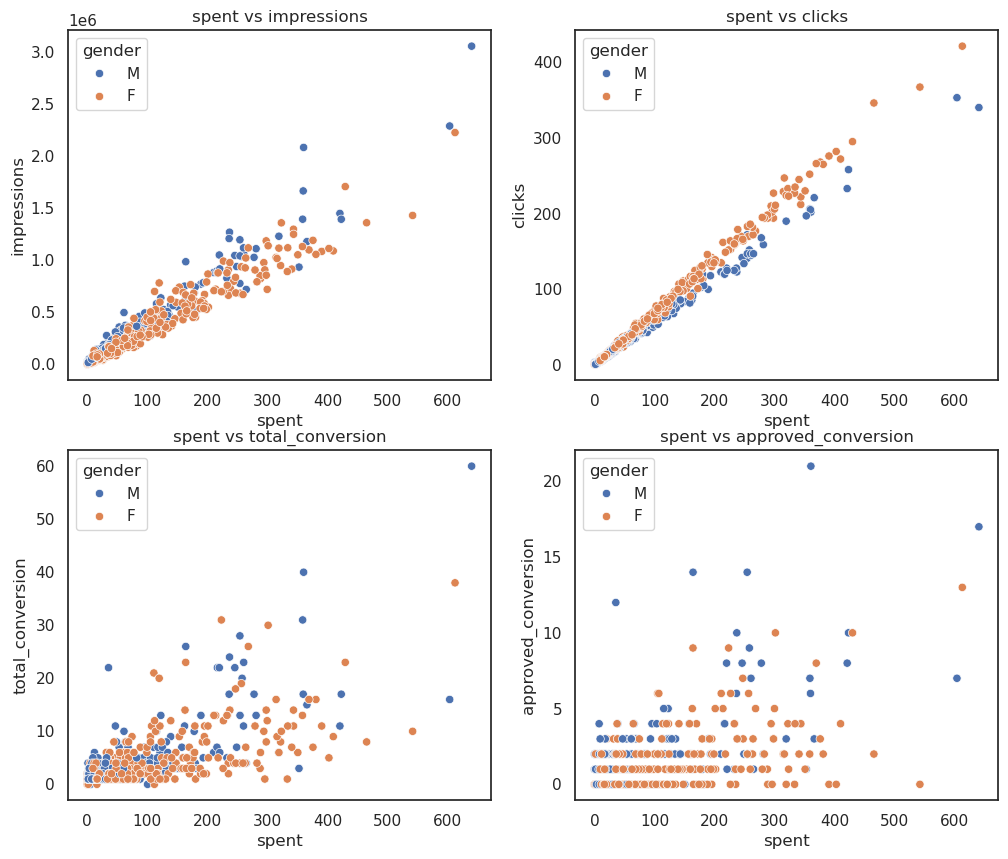

In [225]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
feature_pairs = [('spent', 'impressions'), ('spent', 'clicks'), 
                 ('spent', 'total_conversion'), ('spent', 'approved_conversion')]
hue = 'gender'
for ax, (fea1, fea2) in zip(axes, feature_pairs):
    sns.scatterplot(
        data = df_full,
        x = fea1,
        y = fea2,
        hue = hue,
        ax = ax
    )
    ax.set_title(f"{fea1} vs {fea2}")

<Axes: xlabel='spent', ylabel='impressions'>

Text(0.5, 1.0, 'spent vs impressions')

<Axes: xlabel='spent', ylabel='clicks'>

Text(0.5, 1.0, 'spent vs clicks')

<Axes: xlabel='spent', ylabel='total_conversion'>

Text(0.5, 1.0, 'spent vs total_conversion')

<Axes: xlabel='spent', ylabel='approved_conversion'>

Text(0.5, 1.0, 'spent vs approved_conversion')

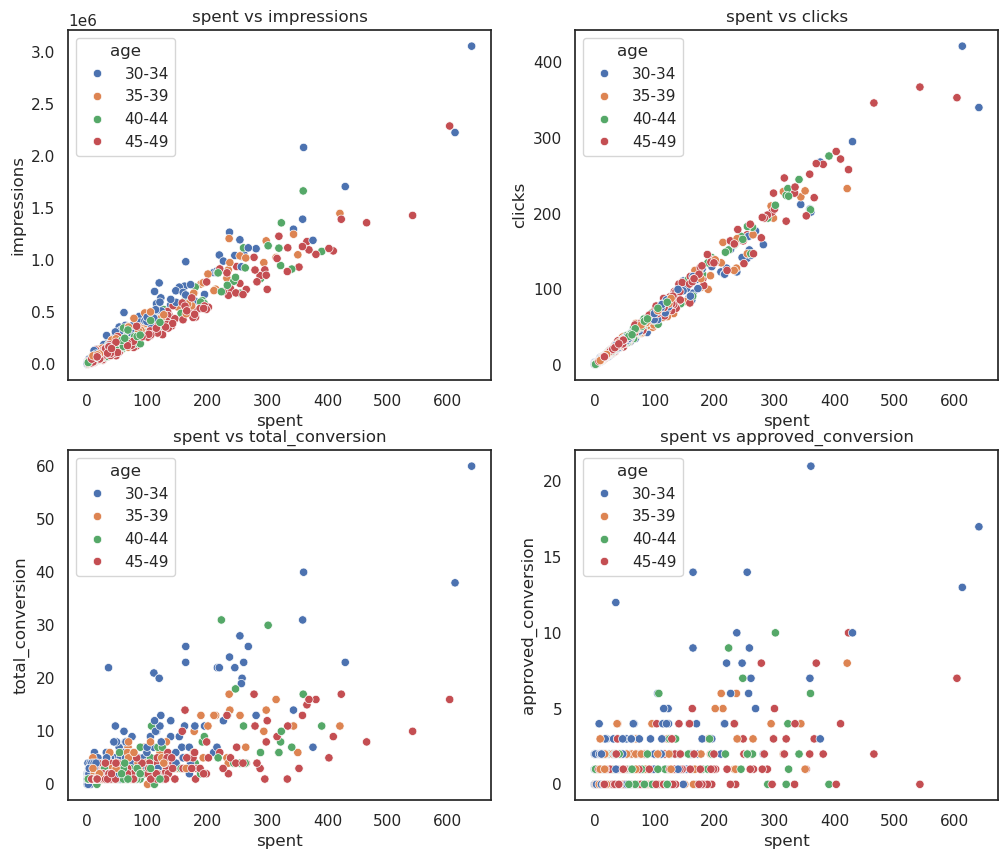

In [226]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
feature_pairs = [('spent', 'impressions'), ('spent', 'clicks'), 
                 ('spent', 'total_conversion'), ('spent', 'approved_conversion')]
hue = 'age'
for ax, (fea1, fea2) in zip(axes, feature_pairs):
    sns.scatterplot(
        data = df_full,
        x = fea1,
        y = fea2,
        hue = hue,
        ax = ax
    )
    ax.set_title(f"{fea1} vs {fea2}")

<Axes: xlabel='impressions', ylabel='approved_conversion'>

Text(0.5, 1.0, 'impressions vs approved_conversion')

<Axes: xlabel='clicks', ylabel='approved_conversion'>

Text(0.5, 1.0, 'clicks vs approved_conversion')

<Axes: xlabel='spent', ylabel='approved_conversion'>

Text(0.5, 1.0, 'spent vs approved_conversion')

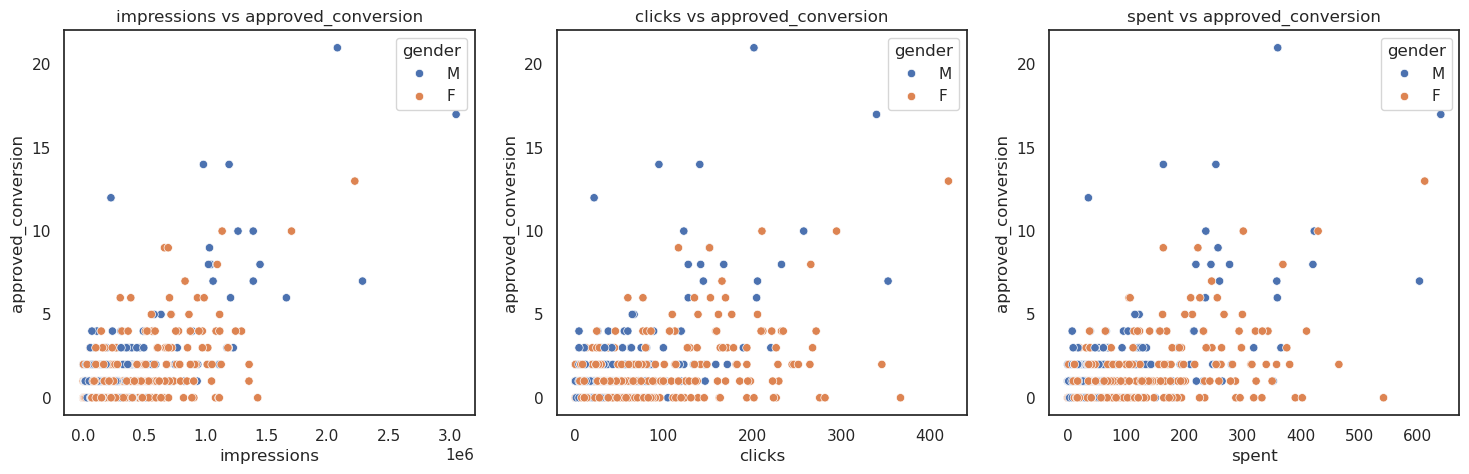

In [231]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()
feature_pairs = [('impressions', 'approved_conversion'), ('clicks', 'approved_conversion'), 
                 ('spent', 'approved_conversion')]
hue = 'gender'
for ax, (fea1, fea2) in zip(axes, feature_pairs):
    sns.scatterplot(
        data = df_full,
        x = fea1,
        y = fea2,
        hue = hue,
        ax = ax
    )
    ax.set_title(f"{fea1} vs {fea2}")


<Axes: xlabel='total_conversion', ylabel='approved_conversion'>

<Axes: xlabel='total_conversion', ylabel='approved_conversion'>

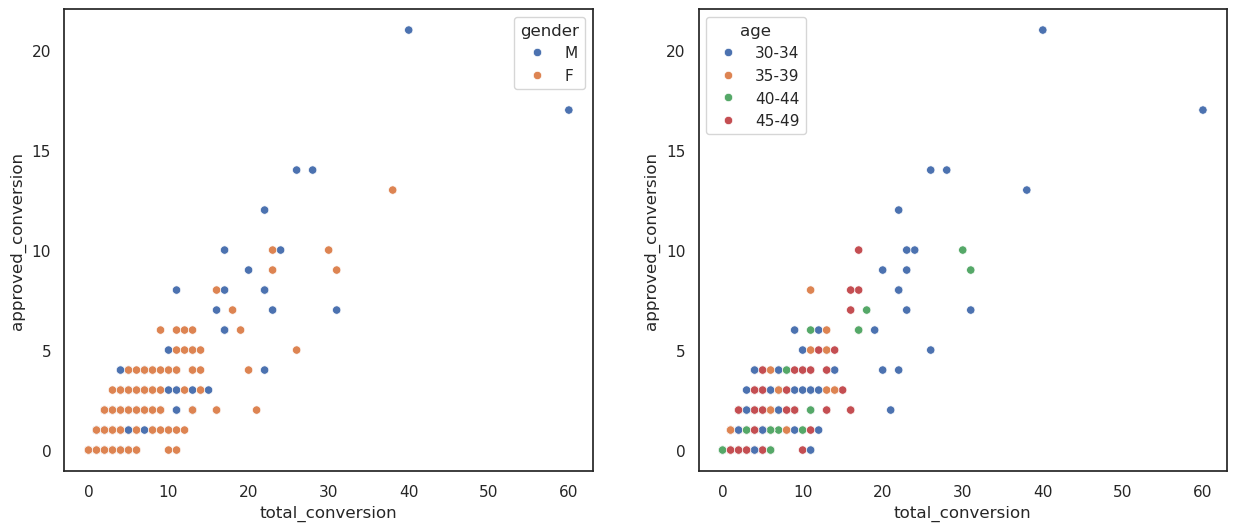

In [229]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes = axes.flatten()
hues = ['gender', 'age']
for ax, hue in zip(axes, hues):
    sns.scatterplot(
        x = 'total_conversion',
        y = 'approved_conversion',
        data = df_full,
        hue = hue,
        ax = ax
    )


#### A/B testing

In [233]:
df_full.head()

,ad_id,reporting_start,reporting_end,interest1,interest2,interest3,campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,cr,ctr,cpc
0,708746,2017-08-17,2017-08-17,15,17,17,916,103916,30-34,M,15,7350,1.0,1.43,2,1,0.000272,0.000136,1.43
1,708749,2017-08-17,2017-08-17,16,19,21,916,103917,30-34,M,16,17861,2.0,1.82,2,0,0.000112,0.000112,0.91
2,708771,2017-08-17,2017-08-17,20,25,22,916,103920,30-34,M,20,693,1.0,0.00,1,0,0.001443,0.001443,0.00
3,708815,2017-08-30,2017-08-30,28,32,32,916,103928,30-34,M,28,4259,1.0,1.25,1,0,0.000235,0.000235,1.25
4,708818,2017-08-17,2017-08-17,28,33,32,916,103928,30-34,M,28,4133,1.0,1.29,1,1,0.000242,0.000242,1.29


Conversion Rate: Conversion ability for each campaign    \
Click through Rate: The ability to attract or engage customers       \
Cost per Click: Cost efficiency for each click

We use these three metrics as assessment for different campaigns, we can first see how different campaigns perform interms of these three metrics.

<Axes: xlabel='campaign_id', ylabel='impressions'>

Text(0.5, 1.0, 'impressions vs campaign_id')

<Axes: xlabel='campaign_id', ylabel='spent'>

Text(0.5, 1.0, 'spent vs campaign_id')

<Axes: xlabel='campaign_id', ylabel='clicks'>

Text(0.5, 1.0, 'clicks vs campaign_id')

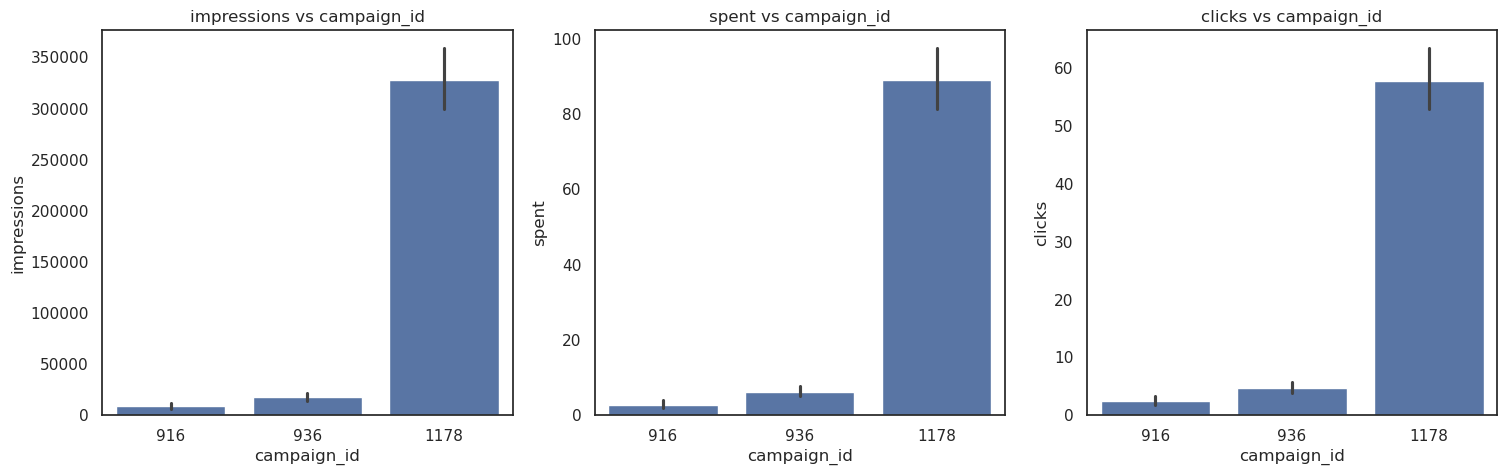

In [244]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()
features = ['impressions', 'spent', 'clicks']
for ax, fea in zip(axes, features):
    sns.barplot(
        x = 'campaign_id',
        y = fea,
        data = df_full,
        ax = ax
    )
    ax.set_title(f"{fea} vs campaign_id")


<Axes: xlabel='campaign_id', ylabel='cr'>

Text(0.5, 1.0, 'cr vs campaign_id')

<Axes: xlabel='campaign_id', ylabel='ctr'>

Text(0.5, 1.0, 'ctr vs campaign_id')

<Axes: xlabel='campaign_id', ylabel='cpc'>

Text(0.5, 1.0, 'cpc vs campaign_id')

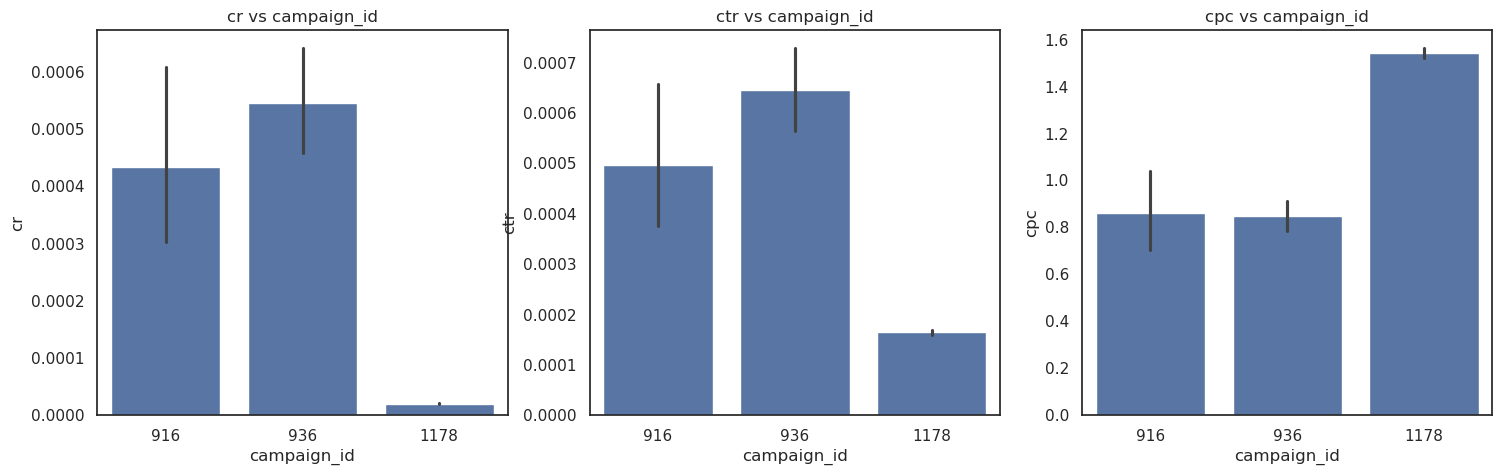

In [243]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()
metrics = ['cr', 'ctr', 'cpc']
for ax, metric in zip(axes, metrics):
    sns.barplot(
        x = 'campaign_id',
        y = metric,
        data = df_full,
        ax = ax
    )
    ax.set_title(f"{metric} vs campaign_id")


#### A/B testing Design

We're trying to see if campaign A, B, C makes difference in ads performance or not, therefore we need to compare between AB, BC, AC. \
Outline: 
1) Do the Shapiro-Wilk test and Levene's test to check if groups is normally distributed and of variance homogenity.
2) if normal and variance homogeneous: perform pair-wise T-test
   if normal and variance not homogeneous: perform Welch's T-test
   if not normal distributed: perform Mann-Whitney U test.
3) Apply Boferroni correction to avoid type I error from multiple comparisons.

In [250]:
W1, p_value1 = shapiro(df_full.loc[df_full["campaign_id"] == 916, "cr"])
W2, p_value2 = shapiro(df_full.loc[df_full["campaign_id"] == 936, "cr"])
W3, p_value3 = shapiro(df_full.loc[df_full["campaign_id"] == 1178, "cr"])

print('The p value for conversion rate of campaign 916: ', p_value1, 'Statistic W:', W1)
print('The p value for conversion rate of campaign 936: ', p_value2, 'Statistic W:', W2)
print('The p value for conversion rate of campaign 1178: ', p_value3, 'Statistic W:', W3)


The p value for conversion rate of campaign 916:  5.963335640336878e-10 Statistic W: 0.657999937664904
The p value for conversion rate of campaign 936:  4.150249512576974e-34 Statistic W: 0.4994882358903242
The p value for conversion rate of campaign 1178:  1.2178821917771916e-33 Statistic W: 0.6549629418349414


The p value for CR(conversion rate) is way less than 0.05, therefore, there's a strong evidence to reject null hypothesis that the CR value is not normally distributed. We can also check it for ctr and cpc.

In [251]:
W1_ctr, p_value1_ctr = shapiro(df_full.loc[df_full["campaign_id"] == 916, "ctr"])
W2_ctr, p_value2_ctr = shapiro(df_full.loc[df_full["campaign_id"] == 936, "ctr"])
W3_ctr, p_value3_ctr = shapiro(df_full.loc[df_full["campaign_id"] == 1178, "ctr"])

print('The p value for conversion rate of campaign 916: ', p_value1_ctr, 'Statistic W:', W1_ctr)
print('The p value for conversion rate of campaign 936: ', p_value2_ctr, 'Statistic W:', W2_ctr)
print('The p value for conversion rate of campaign 1178: ', p_value3_ctr, 'Statistic W:', W3_ctr)

The p value for conversion rate of campaign 916:  8.429557423295814e-11 Statistic W: 0.6054332708213109
The p value for conversion rate of campaign 936:  5.091016777439745e-34 Statistic W: 0.5029767522008708
The p value for conversion rate of campaign 1178:  1.0892198757686165e-05 Statistic W: 0.9860317060281566


In [252]:
W1_cpc, p_value1_cpc = shapiro(df_full.loc[df_full["campaign_id"] == 916, "cpc"])
W2_cpc, p_value2_cpc = shapiro(df_full.loc[df_full["campaign_id"] == 936, "cpc"])
W3_cpc, p_value3_cpc = shapiro(df_full.loc[df_full["campaign_id"] == 1178, "cpc"])

print('The p value for conversion rate of campaign 916: ', p_value1_cpc, 'Statistic W:', W1_cpc)
print('The p value for conversion rate of campaign 936: ', p_value2_cpc, 'Statistic W:', W2_cpc)
print('The p value for conversion rate of campaign 1178: ', p_value3_cpc, 'Statistic W:', W3_cpc)

The p value for conversion rate of campaign 916:  7.768733233031107e-08 Statistic W: 0.7684095784446492
The p value for conversion rate of campaign 936:  2.588529308012372e-24 Statistic W: 0.7840122206129208
The p value for conversion rate of campaign 1178:  1.30539388119074e-31 Statistic W: 0.7064355004471076


The ctr, cr, cpc could all be considered as not normally distributed due to the p-value. Therefore, we can use the non-parametric Mann Whitney U test. 

In [255]:
_, pvalue1 = mannwhitneyu(df_full.loc[df_full["campaign_id"] == 916, "cr"], df_full.loc[df_full['campaign_id'] == 936, "cr"])
_, pvalue2 = mannwhitneyu(df_full.loc[df_full['campaign_id'] == 936, "cr"], df_full.loc[df_full['campaign_id'] == 1178, "cr"])
_, pvalue3 = mannwhitneyu(df_full.loc[df_full['campaign_id'] == 1178, "cr"], df_full.loc[df_full['campaign_id'] == 916, "cr"])

print('p value for comparison between campaign 916 and 936: ', pvalue1)
print('p value for comparison between campaign 936 and 1178: ', pvalue2)
print('p value for comparison between campaign 1178 and 916: ', pvalue3)


p value for comparison between campaign 916 and 936:  0.4339652264015792
p value for comparison between campaign 936 and 1178:  1.7577705732449588e-133
p value for comparison between campaign 1178 and 916:  6.636971249222305e-31


The p-value for comparison between campaign 916 and 936 is 0.434, that the probability of making type I error is 0.434, which is relatively high. Therefore, we have to accept null hypothesis that there's no significant difference between campaign 916 and 936. However, the p-value between 916 and 1178, 936 and 1178 are very small that it's confident to say there's significant difference between performance of campaign 1178 and any other two campaigns. We can also verify the conclusion by checking for ctr and cpc.

In [256]:
_, pvalue1_ctr = mannwhitneyu(df_full.loc[df_full["campaign_id"] == 916, "ctr"], df_full.loc[df_full['campaign_id'] == 936, "ctr"])
_, pvalue2_ctr = mannwhitneyu(df_full.loc[df_full['campaign_id'] == 936, "ctr"], df_full.loc[df_full['campaign_id'] == 1178, "ctr"])
_, pvalue3_ctr = mannwhitneyu(df_full.loc[df_full['campaign_id'] == 1178, "ctr"], df_full.loc[df_full['campaign_id'] == 916, "ctr"])

print('p value for comparison between campaign 916 and 936: ', pvalue1_ctr)
print('p value for comparison between campaign 936 and 1178: ', pvalue2_ctr)
print('p value for comparison between campaign 1178 and 916: ', pvalue3_ctr)

p value for comparison between campaign 916 and 936:  0.953272496172231
p value for comparison between campaign 936 and 1178:  3.933280665286947e-95
p value for comparison between campaign 1178 and 916:  7.306595460471826e-20


In [257]:
_, pvalue1_cpc = mannwhitneyu(df_full.loc[df_full["campaign_id"] == 916, "cpc"], df_full.loc[df_full['campaign_id'] == 936, "cpc"])
_, pvalue2_cpc = mannwhitneyu(df_full.loc[df_full['campaign_id'] == 936, "cpc"], df_full.loc[df_full['campaign_id'] == 1178, "cpc"])
_, pvalue3_cpc = mannwhitneyu(df_full.loc[df_full['campaign_id'] == 1178, "cpc"], df_full.loc[df_full['campaign_id'] == 916, "cpc"])

print('p value for comparison between campaign 916 and 936: ', pvalue1_cpc)
print('p value for comparison between campaign 936 and 1178: ', pvalue2_cpc)
print('p value for comparison between campaign 1178 and 916: ', pvalue3_cpc)

p value for comparison between campaign 916 and 936:  0.7970274733773802
p value for comparison between campaign 936 and 1178:  3.206787240273559e-76
p value for comparison between campaign 1178 and 916:  1.9701792542537628e-18


The results for cpc and ctr also proves the conclusion we draw from the conversion rate. Since we're doing multiple comparison between campaign A and B, B and C, C and A, the probability of type I error increases. Therefore, we perform Bonferroni correction by dividing the current $\alpha$ = 0.05 by 3 as 0.01667 to ensure a more strict significance level check. 

### Machine Learning Model
We can also build a machine learning model to predict how much money to spend based on the campaign id, age, gender, total conversion rate, and approved conversion rate. 

In [275]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [288]:
# Age is ordinal categorical data, we use label encoding
encoder = LabelEncoder()
encoder.fit(df_full['age'])
df_full['age'] = encoder.transform(df_full['age'])

LabelEncoder()

In [289]:
# Gender is non ordinal categorical data, we use one-hot
gender_df = pd.get_dummies(df_full['gender'], prefix='genderId', prefix_sep='_').astype(int)
df_ml = pd.concat([df_full, gender_df], axis=1)

In [310]:
X = df_ml.drop(labels = ['approved_conversion', 'total_conversion', 'reporting_start', 'reporting_end', 'cr', 'ctr', 'cpc'], axis=1)
y = df_ml[['approved_conversion']]

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [312]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [313]:
rfr = RandomForestRegressor(n_estimators = 200, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [314]:
y_pred = rfr.predict(X_test)
y_pred = np.round(y_pred)

mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
print('MSE = ', mse)
print('MAE = ', mae)

MSE =  1.3799126637554586
MAE =  0.7336244541484717


In [315]:
rmse = np.sqrt(mse)
print('RMSE = ', rmse)

RMSE =  1.174696839084646
